## 1. Numerical Error

## Part (a)
Write code to generate an array of length $N$, filled with random numbers from a Gaussian distribution (with mean $x$ and standard deviation $\sigma$), and make a histogram (with $m$ bins) of the array values. (You are encouraged to import functions from numpy and matplotlib.pyplot) Test this code, performing at least two sanity checks to make sure it's working properly.

Mean of the array:  4.997224800200935
Standard deviation of the array:  0.4990703728568316


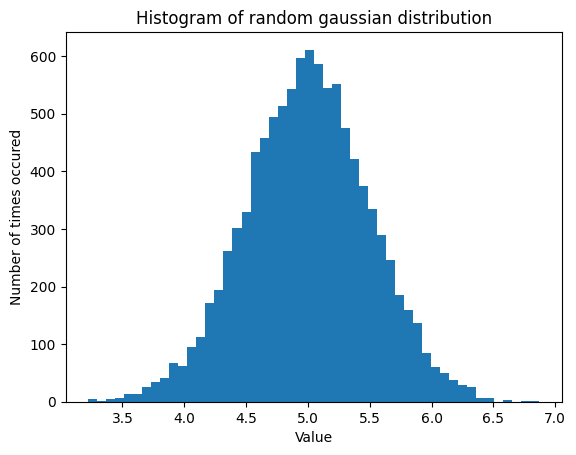

In [115]:
import numpy as np
import matplotlib.pyplot as plt

x = 5  # Mean 
sigma = 0.5  # standard deviation

N = 10000  # Size of array

"""Generate the array"""
gaussian_array = np.random.normal(loc=x, scale = sigma, size = N)

""" Sanity Checks """
print('Mean of the array: ', gaussian_array.mean())
print("Standard deviation of the array: ", gaussian_array.std())

"""Plot into histogram of m bins"""
m = 50  # number of bins for histogram
plt.hist(gaussian_array, m)
plt.xlabel("Value")
plt.ylabel("Number of times occured")
plt.title("Histogram of random gaussian distribution")
plt.show()

## Part (b)
Now write a function to: generate two arrays as in the previous part (where the first Gaussian has  $x_1,\sigma_1$ and the second Gaussian has $x_2,\sigma_2$), make a third array that is the element-wise sum of these two arrays, and make a histogram of the 'array values. The function should take $x_1,\sigma_1, x_2, \sigma_2$ as arguments.

Element-wise addition:  True
Summed Mean:  15.021027004413261
Summed STD:  1.0305241178554134 1.2867750694029867


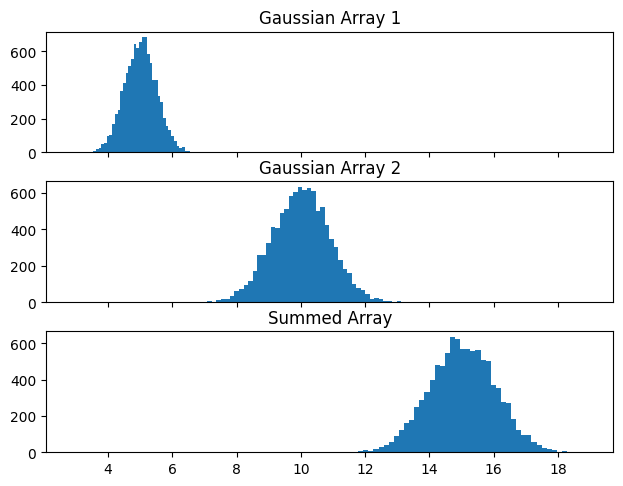

In [116]:
N = 10000  # Size of array redefined

x1 = 5  # mean 1
x2 = 10  # mean 2

sigma1 = 0.5  # standard deviation 1
sigma2 = 0.9  # standard deviation 2

gaussian_array_1 = np.random.normal(loc=x1, scale = sigma1, size = N)
gaussian_array_2 = np.random.normal(loc=x2, scale = sigma2, size = N)

summed_array = gaussian_array_1 + gaussian_array_2

"""Tests"""
print("Element-wise addition: ", gaussian_array_1[0] + gaussian_array_2[0] == summed_array[0])
print("Summed Mean: ", summed_array.mean())
print("Summed STD: ", summed_array.std() , np.sqrt(sigma1**0.5 + sigma2**0.5))  # is this what we expect?



"""Plot histograms"""
m = 50  # number of bins
fig, axs = plt.subplots(3, sharex=True)
fig.tight_layout()
# fig.suptitle('Vertically stacked subplots')
axs[0].hist(gaussian_array_1, m)
axs[0].set_title("Gaussian Array 1")
axs[1].hist(gaussian_array_2, m)
axs[1].set_title("Gaussian Array 2")
axs[2].hist(summed_array, m)
axs[2].set_title("Summed Array")
plt.show()

## Part (c)

Recall from your physics labs, when you make repeated measurements of a quantity, the measurements follow a Gaussian distribution, where the mean (hopefully) represents the 'true' value of the quantity and the standard deviation represents the statistical uncertainty (error) on the measurement. 
If you make repeated measurements of two different quantities, and use these two quantities to calculate a third quantity, the error propagates, so you have to use error propagation formulas to figure out the uncertainty on the third quantity.

Numerical errors in calculations propagate in a similar manner. We can represent the numerical error on stored value $x$ as $\sigma$, and define our fractional error constant as $C$ such that $\sigma = C |x|$.

Plugging this into the previous part, we get $\sigma_1 = C |x_1|, \sigma_2 = C |x_2|$. Try this with: $N=10^6, m=100, C=10^{-14}, x_1 = 100, x_2 = -100$. (For the purposes of this exercise, we're using a much larger value of $C$ than the machine precision, so that we can see its effect.) Now try again with different mean values: $x_1 = 1.0, x_2 = -1.0$

Hopefully, you now see visually why adding a positive number to a negative number, where both have large absolutely values, can produce large errors.

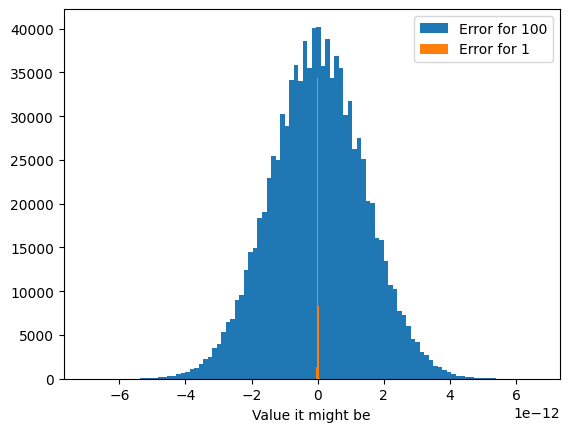

In [117]:
def subtraction_error(value):
    N = int(1e6)  # Size of array redefined
    C = 1e-14

    x1 = value  # mean 1
    x2 = -value  # mean 2

    sigma1 = C*abs(x1)  # standard deviation 1
    sigma2 = C*abs(x2)  # standard deviation 2

    gaussian_array_1 = np.random.normal(loc=x1, scale = sigma1, size = N)
    gaussian_array_2 = np.random.normal(loc=x2, scale = sigma2, size = N)

    summed_array = gaussian_array_1 + gaussian_array_2

    """Plot histograms"""
    m = 100  # number of bins
    plt.hist(summed_array, m, label=f"Error for {value}")

subtraction_error(100)
subtraction_error(1)

plt.xlabel("Value it might be")
plt.legend()
plt.show()

### Note: 1 and -1 shows a 2 order lower error than 100 and -100. The error order is proportional to the main values order.

# 2. Approximation Error

Consider this system representing phasor rotation in the complex plane:
    $$\dot Z = i\omega Z, \quad\text{given}\quad Z_0 = Z(t=0).$$
    
The analytical solution is:
    $Z(t) = Z_0 \exp(i\omega t).$

How can we solve it numerically? We could try using its Taylor expansion:
$$\dot Z(t) = \frac{Z(t+\Delta t)-Z(t)}{\Delta t} + H.O.T. = i\omega Z(t).$$
And use a simple algorithm such as: 
* Start with $Z_0$ = $Z(t=0)=Z_{old}$,
* $Z_{new} = (1+i\omega \Delta t)Z_{old}$,
* repeat for a large number $n$ of timesteps until we complete a full rotation

It turns out this simple algorithm is unstable, because of the accumulation of error.

## Part (a)
Write the code to implement the above algorithm, with $\omega, Z_0, n$ as parameters that can be set in the code. You should end up with an array of $t$ values and an array of $Z$ values covering a full rotation.

You may want to make use of numpy.pi

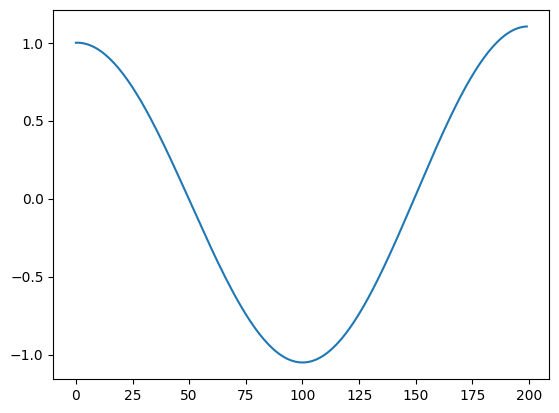

In [118]:
# Define all the values

Z0 = 1
w = 1  # omega
n = 200  # number of timesteps

end_t = 2*np.pi / w  # from the formula, this is how long it takes for e^iwt to go from 1 to 1.

Z_array = np.zeros(n, dtype=complex)
Z_array[0] = Z0

t_array = np.linspace(0, end_t ,n)
dt = t_array[1]-t_array[0]

for i in range(1, n):
    Z_array[i] = (1 + (1j * w * dt)) * Z_array[i-1]

plt.plot(Z_array)  # check if it comes back to the value

## Part (b)
Using the code in the previous part, plot $|Z|(t)$ (absolute value of $Z$, as a function of $t$) for $n=200,Z_0=1,\omega=1$Hz . Is the result what you expected? Why?

Text(0.5, 1.0, 'How the error propagates and Z magnitude increases')

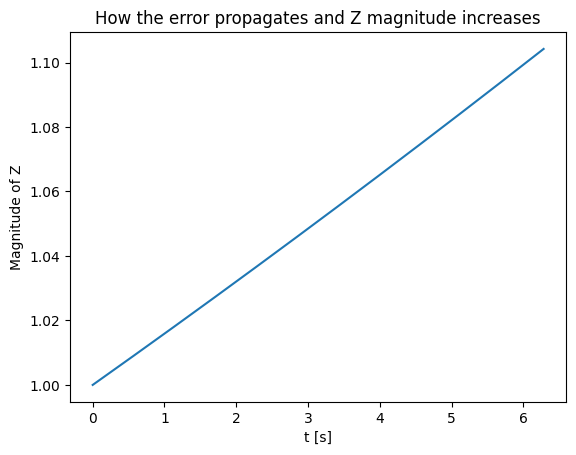

In [119]:
Z_magnitude_array = np.zeros(len(Z_array))

for i in range(len(Z_array)):
    Z_magnitude_array[i] = abs(Z_array[i])


# another way is np.abs(Z_array)

plt.plot(t_array, Z_magnitude_array)
plt.xlabel("t [s]")
plt.ylabel("Magnitude of Z")
plt.title("How the error propagates and Z magnitude increases")